# Manejo de paquetes y ambientes virtuales:

## Comandos ejecutados:

### Creación y activación del entorno:

1.- conda create -n EntreConsultas python=3.7

2.- conda activate EntreConsultas


### Instalación de requerimientos: por rapidez ejecute los siguientes aunque me inclino mas a usar un pip install -r requirements.txt

3.- pip install numpy==1.16.3

4.- pip install opencv-python==4.4.0.40


### Activacion del interprete de python, importación de librerias y prueba de versión:

5.- python

6.- import numpy, cv2

7.- numpy._ _version__

8.- cv2._ _version__

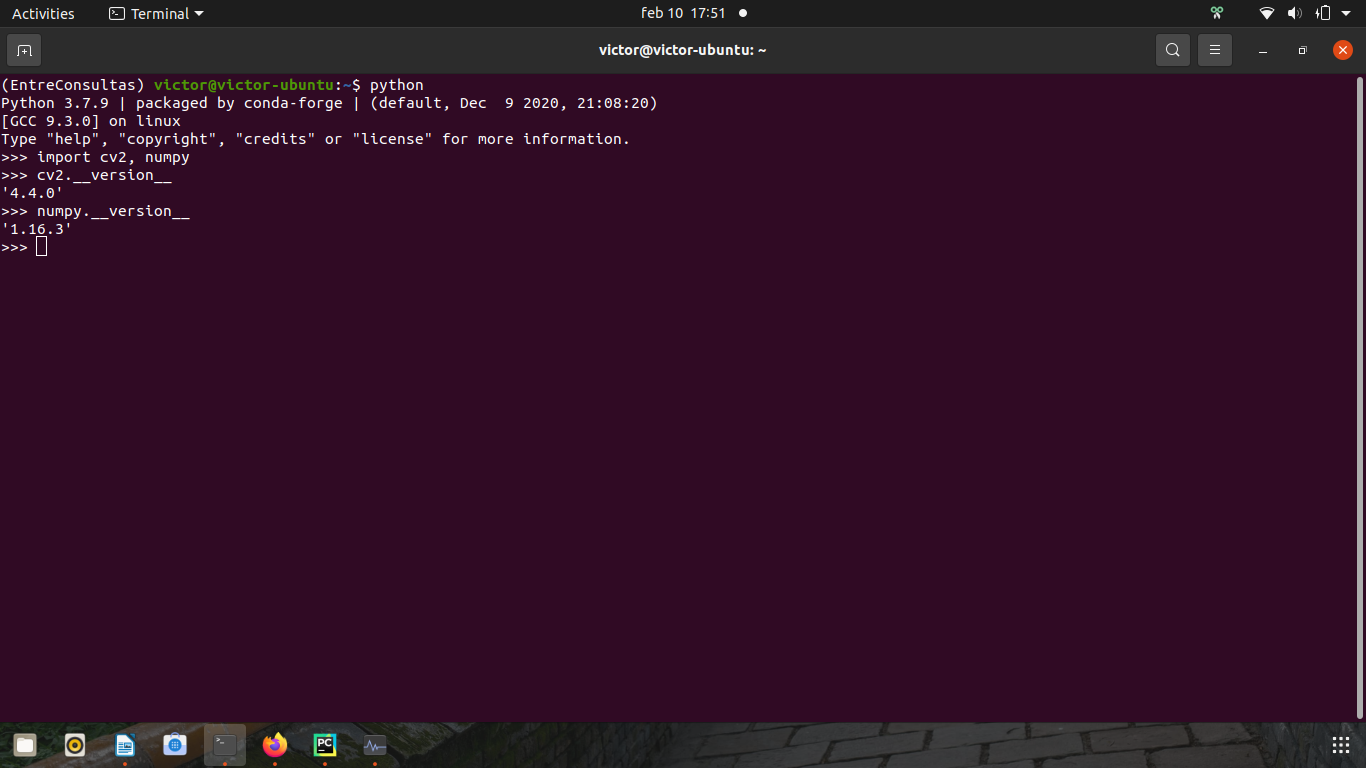

# Operaciones Numéricas y Visión por Computadora

### Implemente utilizando métodos de numpy una función “best_match” que reciba como argumentos:
#### - la matriz de encodings conocidos (known_faces: np.ndarray)
#### - el encoding de un rostro (face: np.ndarray)
#### - un valor de tolerancia (tolerance: float)
### y devuelva: 
#### - el índice del encoding conocido con menor distancia euclidea a face (idx: int)
#### - el valor de distancia obtenido (dist: float) 
#### - True si se trata de un match o False en caso contrario (match: bool)

In [1]:
import numpy as np


def best_match(known_faces: np.array, face: np.array, tolerance: float) -> tuple:
    """Funcion que mide la distancia euclidea entre un vector y las componente de una matriz para
    estimar la semejanza entre ambos y compara con un rango de tolerancia para aceptar si es el
    mismo vector o no
    :param known_faces np.array contiene la matriz de embeddings
    :param face np.array contiene la codificacion de la cara comparar
    :param tolerance float es el umbral de decisión que determinara si coincide o no.
    :returns idx, d_e, match tuple tupla que contiene indice, distancia euclidea e indicacion de match (True para match)
    """
    assert (isinstance(face, np.ndarray) and (isinstance(known_faces, np.ndarray))), f"opera unicamente arrays de numpy"
    assert (known_faces.shape[1] == face.shape[0]), f"Las dimension de la cara suministrada es incorrecta"
    d_e = np.linalg.norm(known_faces-face, axis=1)  # vector
    idx = np.argmin(d_e)  # indice
    match = False
    if d_e[idx] <= tolerance:
        match = True
    return idx, d_e[idx], match

### Usted debe diseñar un script para probar el método que:
#### - Reciba como argumento por consola la ruta a un directorio.
#### - Abra una a una todas las imágenes contenidas en el mismo (.jpg, .jpeg o .png).
#### - Detecte en cada una los logos o anuncios asumiendo que tiene acceso a la clase BrandDetector anteriormente definida.
#### - Genere una nueva imagen donde se haya aplicado un blur/desenfoque intenso a todas las áreas rectangulares detectadas (el resto de la imagen debe quedar intacta).
#### - Guarde cada imagen resultante bajo el mismo nombre en el directorio “./blurred”.

In [ ]:
#!/usr/bin/env python
import os
import argparse
import cv2


class BrandDetector:

    def detect_all(self, img):
        return [((0, 100), (400, 200)), ((300, 100), (500, 500))]


parse = argparse.ArgumentParser()
parse.add_argument("-fp", "--filepath", help="Ruta a directorio con imagenes a evaluar")
args = parse.parse_args()
with os.scandir(args.filepath) as fs:
    imgs = [f.name for f in fs if f.is_file() and f.name.endswith(("jpg", "jpeg", "png"))]
for img in imgs:
    im_loaded = cv2.imread(args.filepath+img)
    bbox = BrandDetector().detect_all(im_loaded)  # HAY QUE INCLUIR EL METODO
    if not os.path.exists("./blurred"):
        os.mkdir("./blurred")
    for xy in bbox:
        x, y = xy[0][0], xy[0][1]
        w, h = xy[0][0] + xy[1][0], xy[0][1] + xy[1][1]
        ROI = im_loaded[y:y+h, x:x+w]
        blur = cv2.blur(ROI, (61, 61), 0)
        im_loaded[y:y+h, x:x+w] = blur
        cv2.imwrite("blurred/"+img, im_loaded)

### Uso del script:
- Puede ser necesario dar permisos de ejecucion al archivo para ello desde la linea de comandos dirigirse a la ruta donde se encuentra el script y ejecutar: __sudo chmod +x script.py__

- Desde linea de comando ejecutar el siguiente comando: __./script.py -fp /ruta/a/directorio/__
    - Ejemplo: __./script.py -fp /home/victor/PycharmProjects/EntreConsultas/__

# Modelado de Datos y Deep Learning

Haga un diagrama simple del pipeline que propondría para obtener un output binario (aceptado/rechazado) suponiendo que su input por cada juguete serán 2 secuencias de 60 imágenes a color y 2 segundos de audio. Especifique qué tipo de modelos/arquitecturas recomendaría utilizar y cómo se acoplarían. Haga un breve listado de los requerimientos que haría al cliente para crear un dataset que le permita entrenar sus modelos y evaluar el algoritmo final.

### inputs: 2 secuencias de imagenes 60 imagenes (videos a 30 fps) + 2 segundos de audio.
### outputs: aceptado/rechazado

### Yo propondria inicialmente tratar por separado el audio de las imagenes, ya que aunque podria haber una relacion entre la falla de audio y la falla estructural del juguete se podria llegar mas rapidamente a un baseline de entrenamiento de modelos mas complejos. Dicho esto el manejo del audio seria el siguiente:

## AUDIO

### - Estudio de correlacion MFCC y FFT, entre los audios de entrada Aprobados y Rechazados, luego lo implementaria mediante una CONV1D simple, con funcion de costo en BinaryCrossentropy, 1 salida sigmoide.

## IMAGENES

### - Dado que cada una de las 60 imagenes de cada fuente corresponden al mismo objeto en periodos de tiempo relativamente iguales en primera instancia usaria cada imagen concatenaria la imagen de la camara 1 con la de la camara 2 (de manera que no se superpongan) y haria pasar esta nueva imagen por un red convolucional 2D, con funcion de costo en BinaryCrossEntropy, Optimizador Adam, y 1 salida sigmoide.


### - Dado que se desea una sola salida acoplaria ambos modelos usando el Modelo general de keras y concatenando las dos salidas y haciendolas pasar por una capa softmax para obtener una unica salida con clase 0 o 1. 

   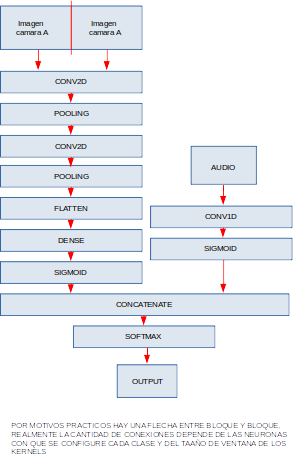

### Aparte de la arquitectura mostrada, existen otras ya implementadas que aunque son mas complejas pueden otorgar mejores resultados, por ejemplo LSTM para el analisis de la secuencia, tanto de imagenes como de audio, Autoencoders para detección de anomalias ejemplo U-NET, en general las soluciones basadas en cnn's deberian brindar respuestas satisfactorias, aunque conviene evaluar laas caracteristicas del producto y la linea de producción, en pro de considerar factores como la iluminación y ruidos externos.

### Requerimientos para el cliente:
#### Fotos:
- Plenamente identificadas como aprobadas/rechazadas. 
- Separadas unas de otras e identificando el defecto en la imagen para poder etiquetarlo en caso de querer implementar otro tipo de soluciones.
- Se requiere en medida de lo posible la misma cantidad de datos aprobados que rechazados.
#### Audios:
- Plenamente identificados y separados aprobados/rechazados.
- Identificación del rango de tiempo en que se presenta el defecto en caso de que sea solo una fracción del tiempo.
- Misma cantidad de datos aprobados y rechazados.
### En ambos casos hay riesgo de overfiting, a menos que se suministre un volumen amplio de datos de ambas clases.